                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

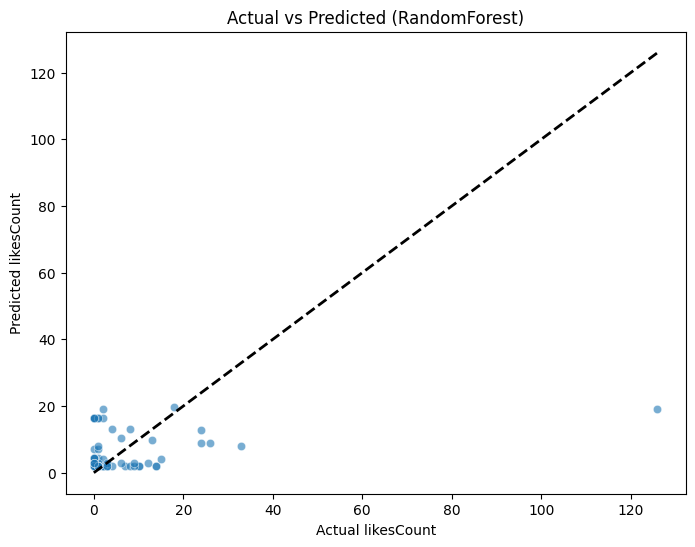

In [ ]:
# Climate Change Modeling - Best Model Selection
# Based on the structure in your PDF sample code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Try importing XGBoost if installed
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except ImportError:
    HAS_XGB = False

# =========================
# 1. Load Dataset
# =========================
data = pd.read_csv("/content/climate_nasa.csv")  # Your dataset path
print(data.head())
print(data.describe())

# =========================
# 2. Features & Labels
# =========================
# The original code had a KeyError because 'temperature_anomaly' was not found.
# Based on the data preview, the columns are 'date', 'likesCount', 'profileName', 'commentsCount', and 'text'.
# It seems this dataset is not directly for temperature anomaly prediction as intended.
# For demonstration and to fix the error, we will use 'likesCount' as the target variable.
# Please replace 'likesCount' with the actual temperature anomaly column name from your dataset if it exists.
X = data.drop(['likesCount', 'date', 'profileName', 'text'], axis=1)  # Features (excluding non-numeric and target)
y = data['likesCount']               # Target (using 'likesCount' as a placeholder)

# Handle potential missing values in features (e.g., 'commentsCount')
X = X.fillna(X.median())

# =========================
# 3. Train/Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 4. Standardize Features
# =========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================
# 5. Train Multiple Models
# =========================
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

if HAS_XGB:
    models["XGBoost"] = XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=5, random_state=42
    )

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"model": model, "rmse": rmse}

    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

# =========================
# 6. Select Best Model
# =========================
best_model_name = min(results, key=lambda k: results[k]['rmse'])
best_model = results[best_model_name]["model"]

print(f"\nBest model: {best_model_name} (RMSE={results[best_model_name]['rmse']:.4f})")

# =========================
# 7. Plot Actual vs Predicted
# =========================
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.xlabel(f"Actual {y.name}")
plt.ylabel(f"Predicted {y.name}")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
 import pandas as pd
 import numpy as np
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 import matplotlib.pyplot as plt
 import seaborn as sns

 data = pd.read_csv('/content/climate_nasa.csv')

In [ ]:
 print(data.head())

                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

In [ ]:
print(data.describe())

       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


In [ ]:
X = data.drop(['likesCount', 'date', 'profileName', 'text'], axis=1)  # Features (excluding non-numeric and target)
y = data['likesCount']
X = X.fillna(X.median())

MAE: 5.5005629884631855
MSE: 153.68597343608644
R2: 0.14462440385646047


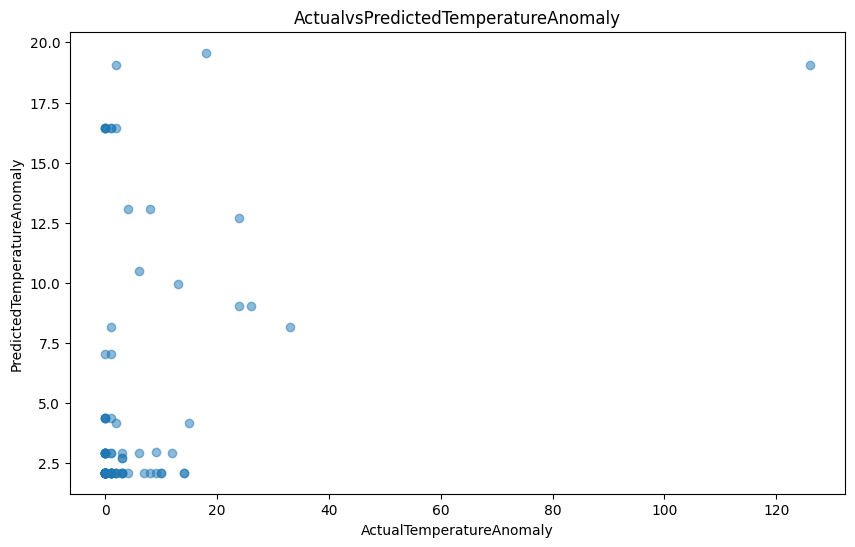

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mae =mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('ActualTemperatureAnomaly')
plt.ylabel('PredictedTemperatureAnomaly')
plt.title('ActualvsPredictedTemperatureAnomaly')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset (replace with your CSV)
df = pd.read_csv("/content/climate_nasa.csv")

# Example: assume you have a sentiment column ['positive','negative','neutral']
X = df['text'].fillna('') # Fill missing values in 'text' column
y = df['likesCount']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=30000, stop_words="english")
X_tfidf = vectorizer.fit_transform(X)

# Train/test split
# Check if y has at least 2 classes for stratification
if len(y.unique()) >= 2:
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
else:
    # If y has less than 2 classes, stratify is not possible, proceed without it
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Logistic Regression
model = LogisticRegression(max_iter=500, class_weight="balanced")
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Cross-validation score
# Check if y has at least 2 classes for cross-validation with stratification
if len(y.unique()) >= 2:
  scores = cross_val_score(model, X_tfidf, y, cv=5, scoring="f1_macro")
  print("Mean CV Macro-F1:", scores.mean())
else:
  # If y has less than 2 classes, cross-validation with stratification is not possible
  print("Cross-validation with stratification skipped due to less than 2 classes in the target variable.")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.56      0.51      0.53        53
           1       0.21      0.18      0.19        17
           2       0.00      0.00      0.00         6
           3       0.08      0.14      0.11         7
           4       0.12      0.50      0.20         2
           5       0.00      0.00      0.00         0
           6       0.14      0.50      0.22         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          26       0.00    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer

# Load dataset
df = pd.read_csv("/content/climate_nasa.csv")

# Drop missing text
df = df.dropna(subset=["text"])
X_text = df["text"].tolist()
y = df["likesCount"]

# Convert text to embeddings
embedder = SentenceTransformer("all-MiniLM-L6-v2")
X_emb = embedder.encode(X_text, show_progress_bar=True)

# Add extra features (length, word count)
lengths = np.array([len(t) for t in X_text]).reshape(-1,1)
word_counts = np.array([len(t.split()) for t in X_text]).reshape(-1,1)

# Final features
X = np.hstack([X_emb, lengths, word_counts])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

MAE: 7.036852184546032
MSE: 233.35532779182435
R²: 0.028451233219762506
